# About Dataset
### Data Science Job Salaries Dataset contains 11 columns, each are:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

In [1]:
# Install the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load the data set
data=pd.read_csv('ds_salaries.csv')
#visualize the top five rows in the data using the head function
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Data Preprocessing 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [4]:
#data columns
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
data.shape

(607, 11)

In [6]:
#print the shape of the data set
print(f'In the Data rows is {data.shape[0]} and column is {data.shape[1]}')

In the Data rows is 607 and column is 11


In [7]:
#Checking the null values in the data 
data.isna().sum().sort_values(ascending=False)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Understanding the Stastics in the data set
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


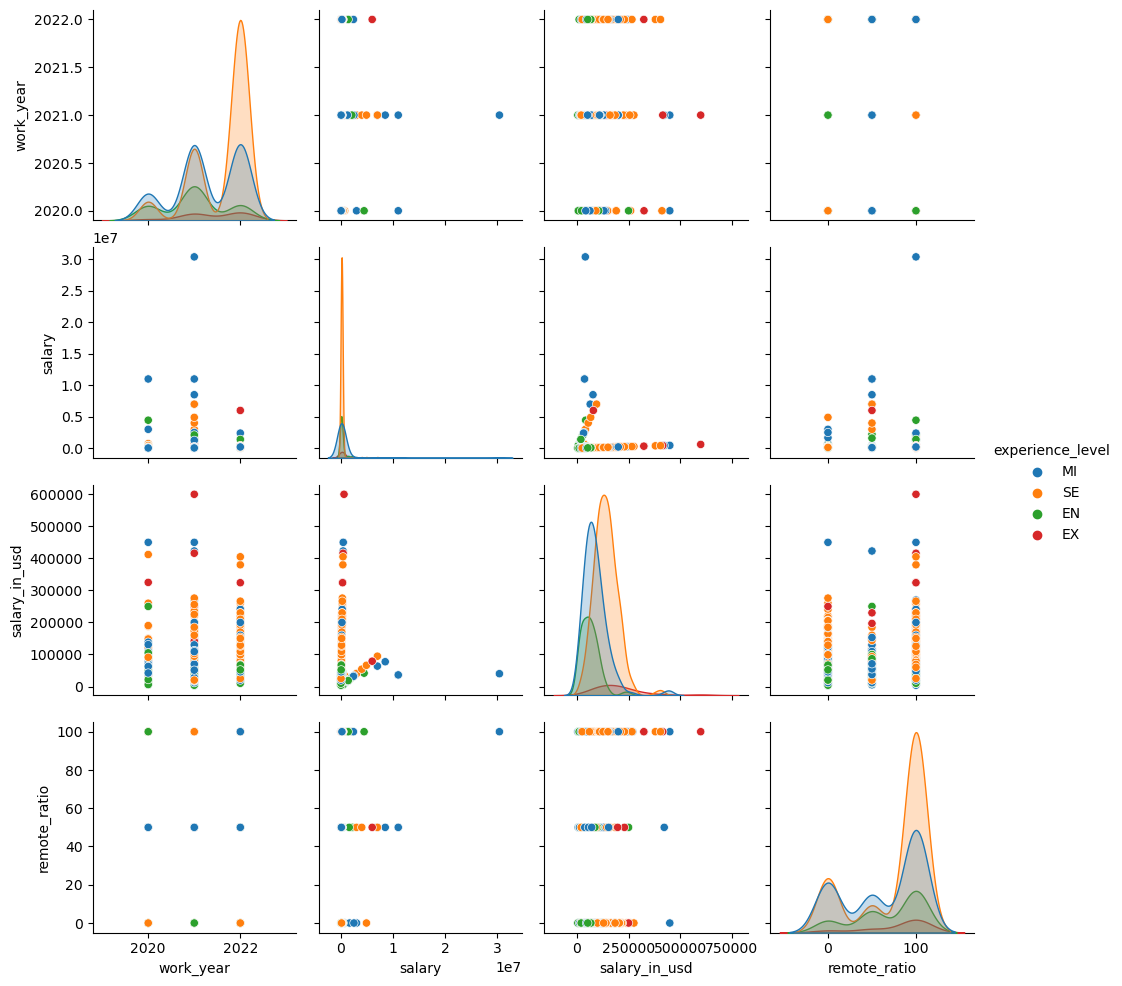

In [9]:
sns.pairplot(data,hue='experience_level')

In [10]:
datanew=data[['work_year','salary']]

In [11]:
corr=data[['work_year','salary']].corr()

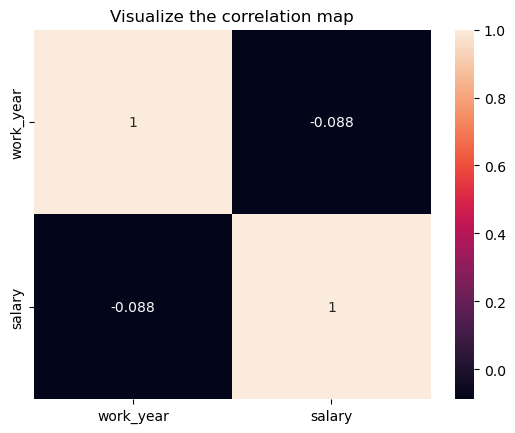

In [12]:
# Visualize the Correlation map

sns.heatmap(corr,annot=True)
plt.title("Visualize the correlation map")
plt.show()

#### Observations:
- In the Correlation map it's clearly understand some columns are have negative correlation
- Work year column negative correlation with Salary and Remote_ratio

# Explore Data Analysis (EDA Process)

### Identify the which year most of the data scientist salaries posted in the data

In [25]:
data['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

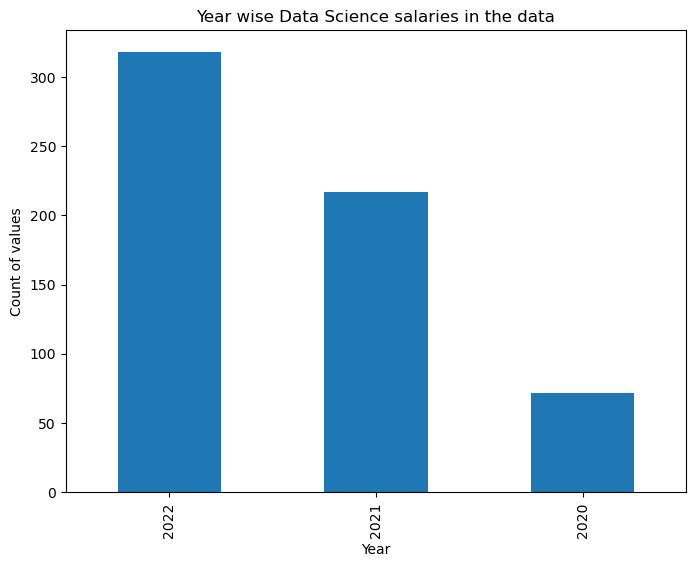

In [26]:

data['work_year'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Year wise Data Science salaries in the data")
plt.xlabel("Year")
plt.ylabel("Count of values")
plt.show()

### Identify the Which type of the people have in the data set using the pie chart

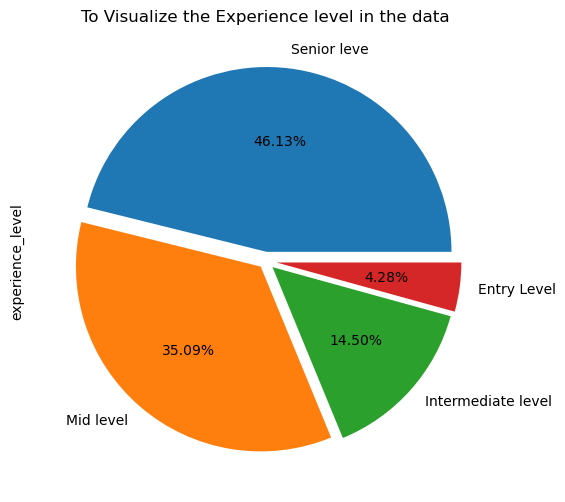

In [27]:
data['experience_level'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="To Visualize the Experience level in the data",explode=[0.05,0.04,0.05,0.06],
    labels=['Senior leve','Mid level','Intermediate level','Entry Level'],
    autopct='%1.2f%%')
plt.show()

### Observations:
#### bar chart
- In the year 2023 most of the data scientist salaries posted compare to the other years
- In 2020 we get received the less data scientist salaries

#### Pie Chart
- In the pie chart we observe most of the company hire senior roles as data scientist it means 46 % employess are senior level Data Scientist
- Only 4 % people recurite the entry level data scientist

### Create histogram to understanding Salary with Expreience wise

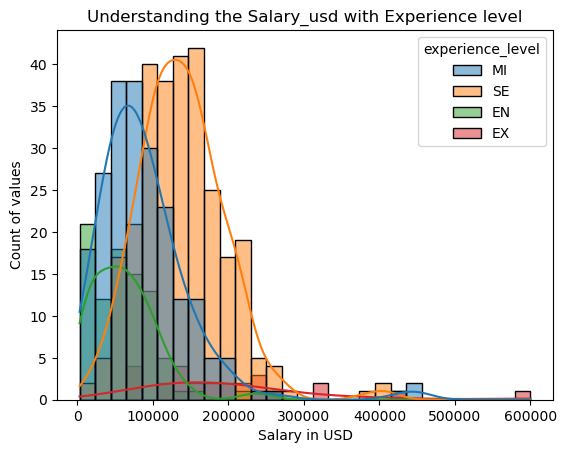

In [29]:
# Kernel density estimate (kde)
sns.histplot(data=data,x='salary_in_usd',hue='experience_level',kde=True)
plt.title("Understanding the Salary_usd with Experience level")
plt.xlabel("Salary in USD")
plt.ylabel("Count of values")
plt.show()

### Create a histogram with company wise paying the more salary as data scientist

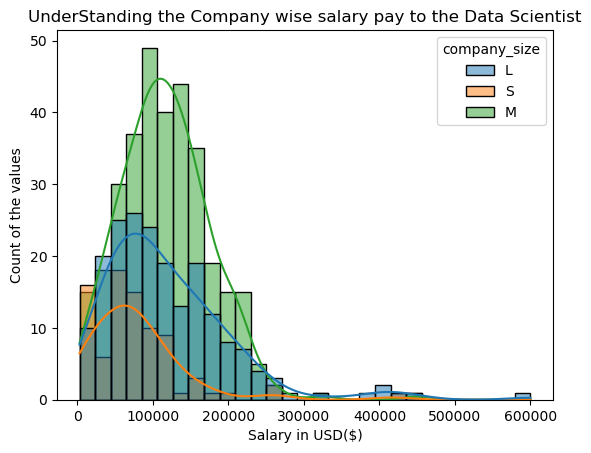

In [30]:

sns.histplot(data=data,x='salary_in_usd',hue='company_size',kde=True)
plt.title("UnderStanding the Company wise salary pay to the Data Scientist")
plt.xlabel("Salary in USD($)")
plt.ylabel("Count of the values")
plt.show()

### Observations:
- From the Two histogram we observed some intresting thing about company size and expeience level along with salary in usd
- In the First chart most of the executive employee recived 100k to 600K
- Middle level data scientist get nearly 100k to 400k 
- In the Second chart we visualize the company size with salary in usd
- Large companys pays well as a data scientist the range should be 5 k to 600k
- medium compays also have highest data scientist with pay range 10 k to 450k

### Visualize the bar chart the average salary for the data scientist with experience level and job title

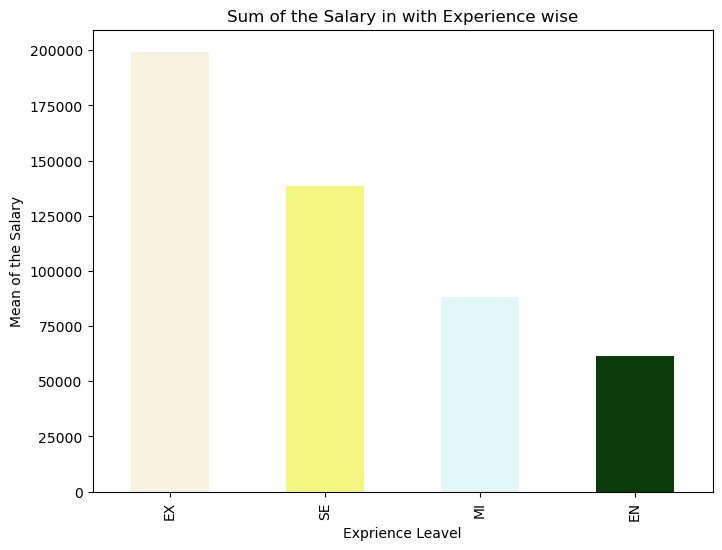

In [17]:


data.groupby(['experience_level'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Sum of the Salary in with Experience wise",figsize=(8,6),color=['#F7F2E0','#F3F781','#E0F8F7','#0B3B0B'])
plt.xlabel("Exprience Leavel")
plt.ylabel("Mean of the Salary")
plt.show()

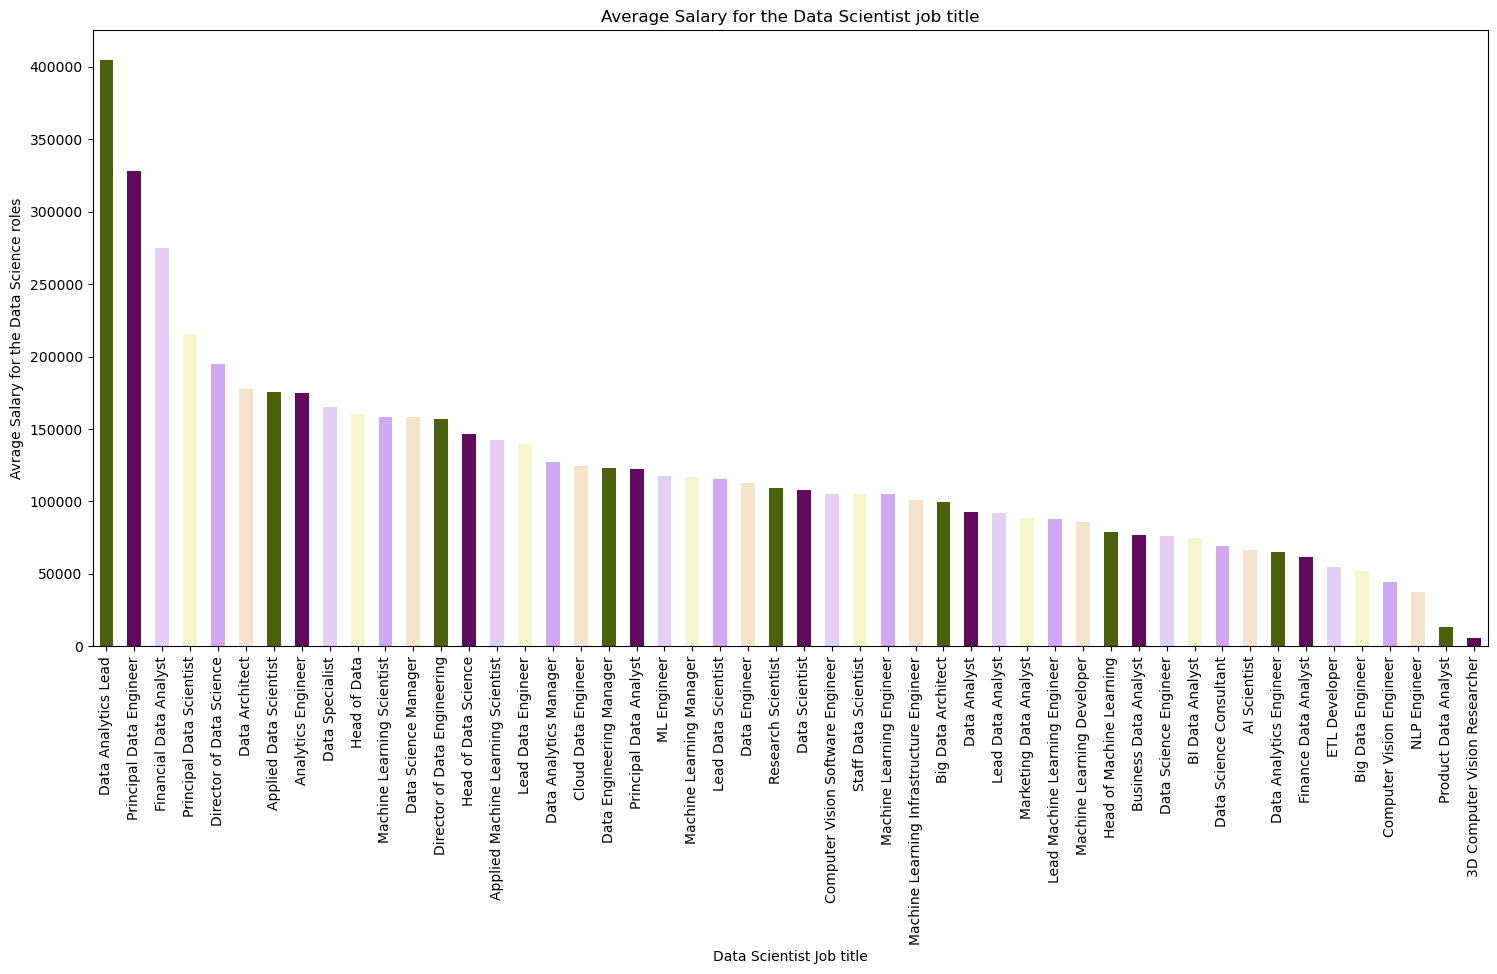

In [31]:
data.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(18,8),title="Average Salary for the Data Scientist job title",color=['#4B610B','#610B5E','#E3CEF6','#F5F6CE','#D0A9F5','#F6E3CE'])
plt.xlabel("Data Scientist Job title")
plt.ylabel("Avrage Salary for the Data Science roles")
plt.xticks(rotation=90)
plt.show()

### Observations:
- From the two chart we observed several informations
- Executive people we received more salary compare to the remaing expreience people and less salay get as entry level Expreience people
- In the Second chart Data Analytics Lead get the highest average salary compare to other and Power bi developer get less salary compare to the others roels.

### How much small companys pay for the different roles and who are the highest paid

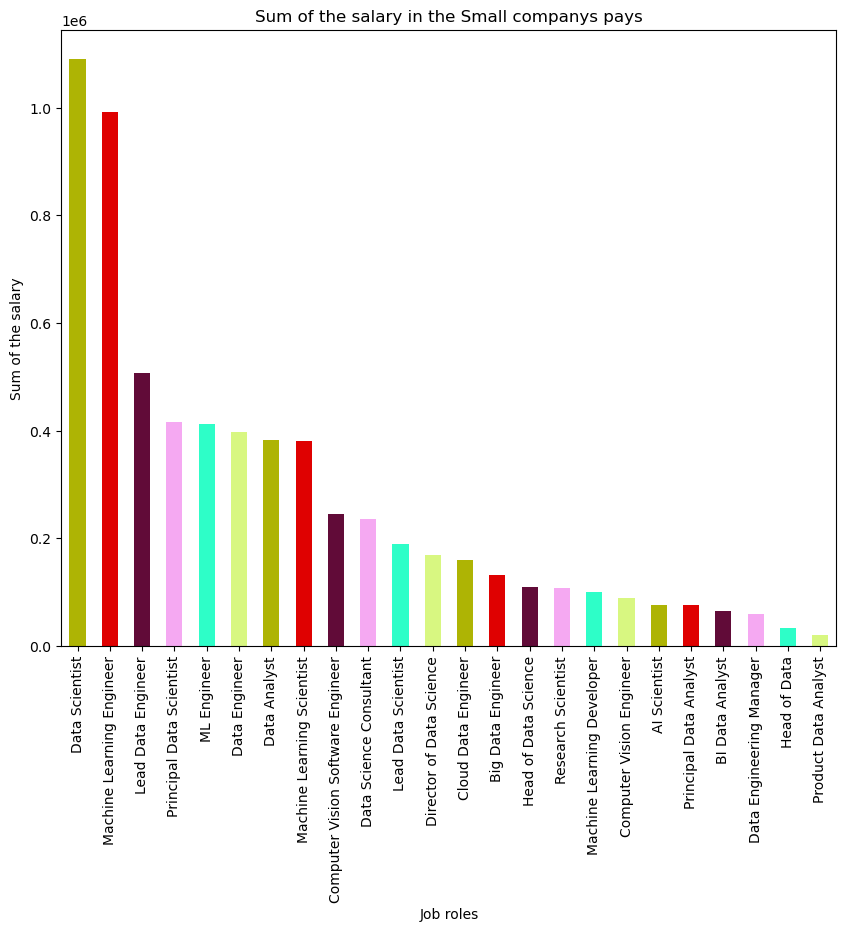

In [19]:

small=data['company_size']=='S'
data.loc[small].groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,8),title="Sum of the salary in the Small companys pays",color=['#AEB404','#DF0101','#610B38','#F5A9F2','#2EFEC8','#D8F781'])
plt.xlabel("Job roles")
plt.ylabel("Sum of the salary")
plt.show()

### Observations:
- From the above data scientist is the high paying job in the small industries 
- We strongly understanding data scientis is the key role in the data field.

### Top 10 most demanding job in the USA 

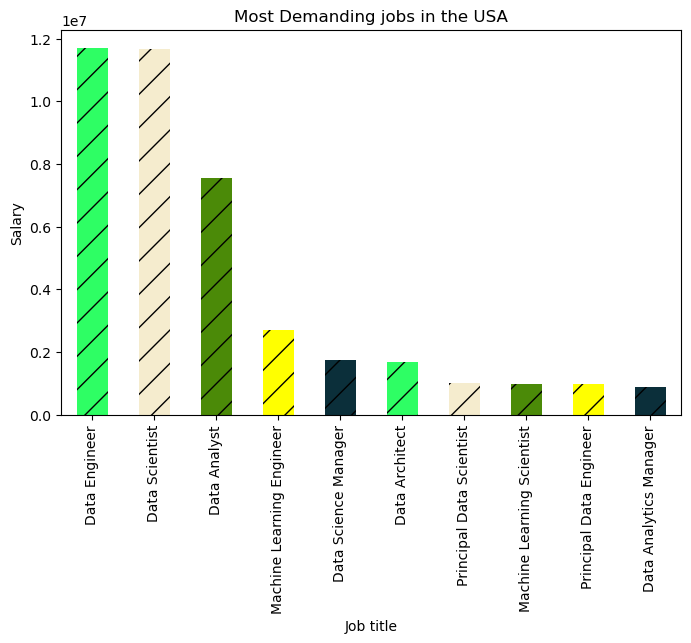

In [20]:

usa=data['employee_residence']=='US'
data.loc[usa].groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',title="Most Demanding jobs in the USA",figsize=(8,5),color=['#2EFE64','#F5ECCE','#4B8A08','#FFFF00','#0B2F3A'],hatch='/')
plt.xlabel("Job title")
plt.ylabel("Salary")
plt.show()

### Find the Average Salary paying the large companys with employement wise

In [21]:

large=data['company_size']=='L'
data.loc[large].groupby(['employment_type'])[['salary_in_usd']].mean().sort_values(by='salary_in_usd',ascending=False)

,salary_in_usd
employment_type,
CT,185000.000000
FT,119665.362694
PT,62349.000000
FL,20000.000000


### Observations:
- From the Two chart what we observed.
- In the USA data engineer is the high paying job and Data Scientist roles second paying jobs
- In the second chart also medium compays also pays well for Data Engineer and data Scientist roles
- In the Large companys the contract employess get more salary compare to the other employess.


In [22]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


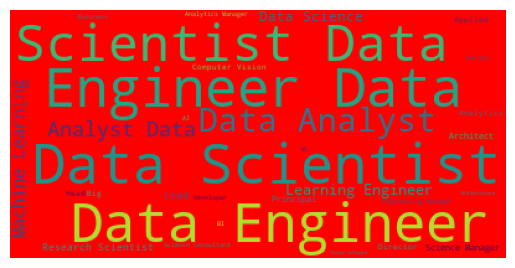

In [23]:
#We import the wordcloud from the 
from wordcloud import WordCloud
text3 = ' '.join(data['job_title'])
wordcloud2 = WordCloud(mode='RGB',background_color='red').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# conclusion:
#### We take the data from the kaggle website and Data Some the data Preprocessing setps based on the above columns we create some EDA part in the part we answerd differnt question.